In [17]:
# import and set up

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('BuGn_r')

In [5]:
# import data

customers = pd.read_csv('Ecommerce Customers')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
# get insight of the data

customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [22]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


There are total of 7 columns in this data - 3 non-numerical, 5 numerical. 
And total of 500 rows

TIPS :<br />
<b>Avg. Session Length</b> : Average session of in-store style advice sessions.<br />
<b>Time on App</b> : Average time spent on App in minutes<br />
<b>Time on Website</b> : Average time spent on Website in minutes<br />
<b>Length of Membership</b> : How many years the customer has been a member.<br />

Since the question to be answered is do we need to focus on time on app or time on website, so, let's do some plotting against yearly amount spent

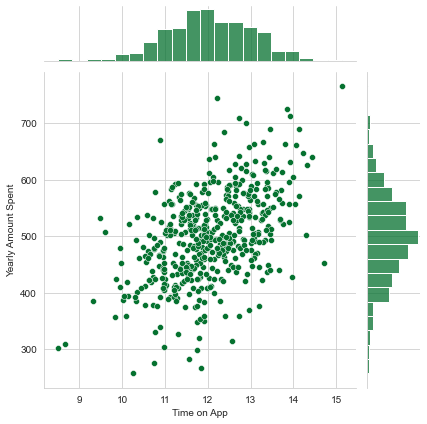

In [19]:
# time on app

sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

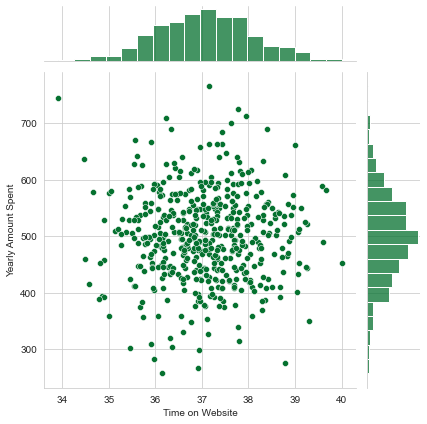

In [21]:
# time on website

sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

From both plots above, we can see that Time on App highly correlated with Yearly Amount Spent compared to Time on Website

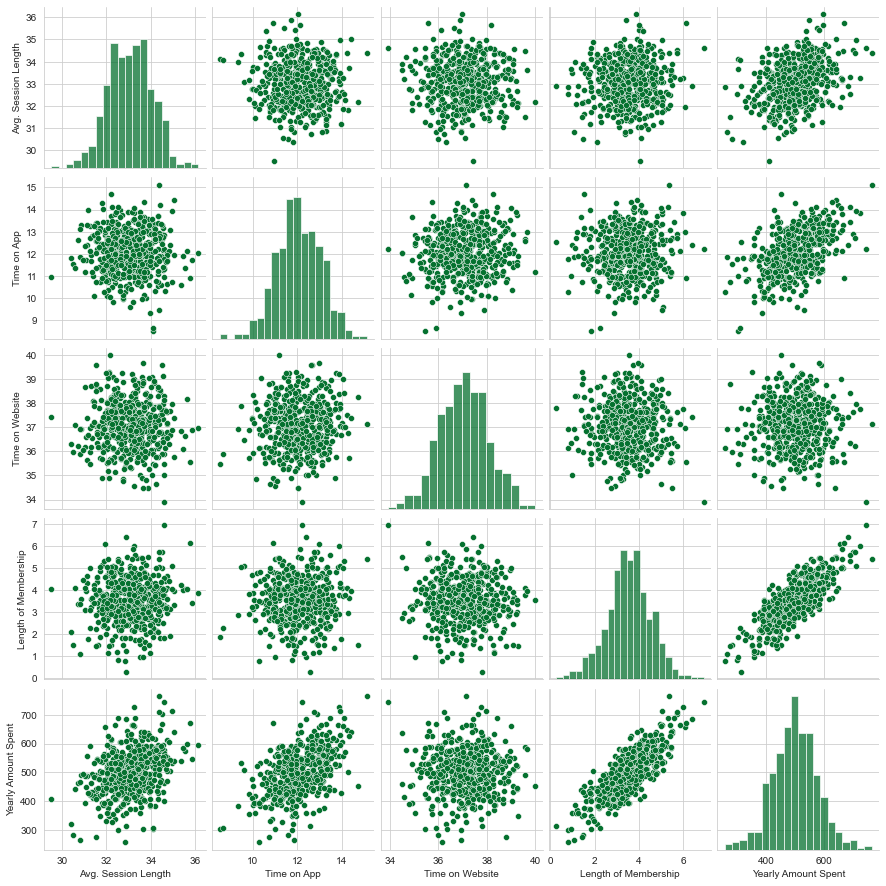

In [24]:
# pairplot 

sns.pairplot(customers)

From the pairplot, Length of Membership has a strong corrrelation with yearly amount spent compared to other features. Let's plot linear regression plot on Length of Membership and Yearly Amount Spent.

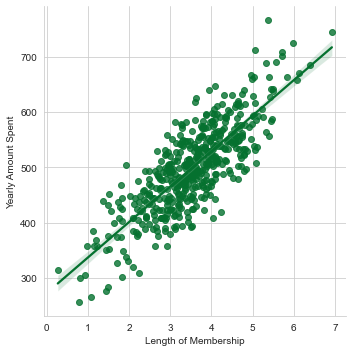

In [75]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

Length of Membership is linearly correlated with Yearly Amount Spent.

<b>*TRAINING AND TESTING DATA SET*</b>

In [38]:
# assign all numerical features to X and Yearly Amount Spent as y

X = customers.drop(['Email','Address','Avatar','Yearly Amount Spent'], axis=1)
y = customers['Yearly Amount Spent']
print('X : ')
print(X.head())
print()
print('Y : ')
print(y.head())

X : 
   Avg. Session Length  Time on App  Time on Website  Length of Membership
0            34.497268    12.655651        39.577668              4.082621
1            31.926272    11.109461        37.268959              2.664034
2            33.000915    11.330278        37.110597              4.104543
3            34.305557    13.717514        36.721283              3.120179
4            33.330673    12.795189        37.536653              4.446308

Y : 
0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64


In [62]:
# split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
# train data

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [72]:
# coefficients of the model

coef = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'])
coef

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


<b>*PREDICTIONS*</b>

Text(0, 0.5, 'Predicted Values')

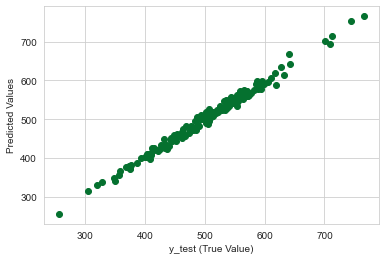

In [78]:
# let's plot predictions against real value

plt.scatter(y_test, predictions)
plt.xlabel('y_test (True Value)')
plt.ylabel('Predicted Values')

We can see a sort of straight line on the above plot. Our model is quite good.

In [66]:
# predictions of test data

predictions = lm.predict(X_test)
print(predictions)

[456.44186104 402.72005312 409.2531539  591.4310343  590.01437275
 548.82396607 577.59737969 715.44428115 473.7893446  545.9211364
 337.8580314  500.38506697 552.93478041 409.6038964  765.52590754
 545.83973731 693.25969124 507.32416226 573.10533175 573.2076631
 397.44989709 555.0985107  458.19868141 482.66899911 559.2655959
 413.00946082 532.25727408 377.65464817 535.0209653  447.80070905
 595.54339577 667.14347072 511.96042791 573.30433971 505.02260887
 565.30254655 460.38785393 449.74727868 422.87193429 456.55615271
 598.10493696 449.64517443 615.34948995 511.88078685 504.37568058
 515.95249276 568.64597718 551.61444684 356.5552241  464.9759817
 481.66007708 534.2220025  256.28674001 505.30810714 520.01844434
 315.0298707  501.98080155 387.03842642 472.97419543 432.8704675
 539.79082198 590.03070739 752.86997652 558.27858232 523.71988382
 431.77690078 425.38411902 518.75571466 641.9667215  481.84855126
 549.69830187 380.93738919 555.18178277 403.43054276 472.52458887
 501.82927633 4

A straight line can be seen on the above y_test vs predictions plot. Thus, we our model is good.

<b>*EVALUATION*</b>

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error
4. R squared

In [81]:
from sklearn import metrics

print('R^2  : ', metrics.explained_variance_score(y_test, predictions))
print('MAE  : ', metrics.mean_absolute_error(y_test, predictions))
print('MSE  : ', metrics.mean_squared_error(y_test, predictions))
print('RSME : ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R^2  :  0.9890771231889607
MAE  :  7.228148653430838
MSE  :  79.81305165097451
RSME :  8.933815066978637


R squared = 0.98. This means that our model explains 98% of the variance of the target variable.

The errors are quite small which indicated a good model. Let's plot the residuals.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

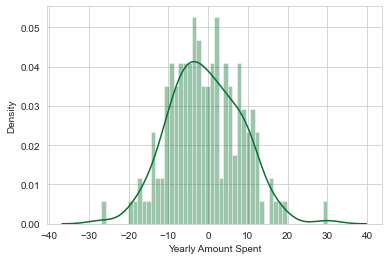

In [84]:
sns.distplot(y_test-predictions, bins=50)

Above residuals plot is normally distributed. Thus, our model is good.

<b>*CONCLUSION*</b>

Let's get back to the question : Do we need to focus on App or Website?

In [74]:
coef

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


From the coefficient, with other variables held constant, 1 unit change in time on app will increase the customer's yearly amount spent by $$38.59 while 1 unit change in time on website will increase the customer's yearly amount spent by $0.19.

Therefore, we need to focus more on app since this will eventually increase the company's profit.